<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

hA = sigmoid(a * xA + b)

hB = sigmoid(a * xB + b)

y = c * hA * hB + d

In [1]:
from keras import models, layers
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = 2
b = 1
c = 2
d = 1

def sigmoid(x):
    return 1 / (1+np.exp(-x))

Using TensorFlow backend.


In [2]:
x_train_A = np.random.rand(1000, 1) * 2 - 1
x_train_B = np.random.rand(1000, 1) * 2 - 1

y_train = c * sigmoid(a * x_train_A + b) * sigmoid(a * x_train_B + b) + d

In [3]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')

shared_layer = layers.Dense(1, activation='sigmoid', name='shared')

sA = shared_layer(xA)
sB = shared_layer(xB)

mul = layers.Multiply(name='mul1')([sA, sB])
y = layers.Dense(1, name='y')(mul)

model = models.Model([xA, xB], y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 (None, 1)            0                                            
__________________________________________________________________________________________________
shared (Dense)                  (None, 1)            2           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
mul1 (Multiply)                 (None, 1)            0           shared[0][0]                     
          

In [4]:
model.compile('adam', 'mse')
hist = model.fit([x_train_A, x_train_B], y_train, batch_size=8, epochs=200, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 1s 2ms/step - loss: 2.4834 - val_loss: 2.1932
Epoch 2/200
800/800 [==============================] - 0s 217us/step - loss: 2.0049 - val_loss: 1.7472
Epoch 3/200
800/800 [==============================] - 0s 219us/step - loss: 1.5780 - val_loss: 1.3557
Epoch 4/200
800/800 [==============================] - 0s 216us/step - loss: 1.2088 - val_loss: 1.0208
Epoch 5/200
800/800 [==============================] - 0s 219us/step - loss: 0.8997 - val_loss: 0.7457
Epoch 6/200
800/800 [==============================] - 0s 217us/step - loss: 0.6486 - val_loss: 0.5289
Epoch 7/200
800/800 [==============================] - 0s 216us/step - loss: 0.4537 - val_loss: 0.3618
Epoch 8/200
800/800 [==============================] - 0s 218us/step - loss: 0.3077 - val_loss: 0.2409
Epoch 9/200
800/800 [==============================] - 0s 222us/step - loss: 0.2034 - val_loss: 0.1564
Epoch 10/200
800/800 [=======

800/800 [==============================] - 0s 222us/step - loss: 3.0213e-04 - val_loss: 2.2124e-04
Epoch 76/200
800/800 [==============================] - 0s 218us/step - loss: 2.9571e-04 - val_loss: 2.1474e-04
Epoch 77/200
800/800 [==============================] - 0s 212us/step - loss: 2.8836e-04 - val_loss: 2.1674e-04
Epoch 78/200
800/800 [==============================] - 0s 229us/step - loss: 2.8448e-04 - val_loss: 2.0532e-04
Epoch 79/200
800/800 [==============================] - 0s 216us/step - loss: 2.7755e-04 - val_loss: 2.0438e-04
Epoch 80/200
800/800 [==============================] - 0s 216us/step - loss: 2.7016e-04 - val_loss: 2.0045e-04
Epoch 81/200
800/800 [==============================] - 0s 222us/step - loss: 2.6168e-04 - val_loss: 1.9448e-04
Epoch 82/200
800/800 [==============================] - 0s 219us/step - loss: 2.5352e-04 - val_loss: 1.8644e-04
Epoch 83/200
800/800 [==============================] - 0s 202us/step - loss: 2.4664e-04 - val_loss: 1.8063e-04
Epoch

Epoch 148/200
800/800 [==============================] - 0s 221us/step - loss: 8.0505e-10 - val_loss: 4.0907e-10
Epoch 149/200
800/800 [==============================] - 0s 221us/step - loss: 4.1087e-10 - val_loss: 2.1619e-10
Epoch 150/200
800/800 [==============================] - 0s 217us/step - loss: 2.0141e-10 - val_loss: 1.5460e-10
Epoch 151/200
800/800 [==============================] - 0s 221us/step - loss: 9.7134e-11 - val_loss: 4.6226e-11
Epoch 152/200
800/800 [==============================] - 0s 217us/step - loss: 4.2165e-11 - val_loss: 2.3665e-11
Epoch 153/200
800/800 [==============================] - 0s 218us/step - loss: 1.7683e-11 - val_loss: 8.2336e-12
Epoch 154/200
800/800 [==============================] - 0s 214us/step - loss: 7.5780e-12 - val_loss: 3.9035e-12
Epoch 155/200
800/800 [==============================] - 0s 215us/step - loss: 3.0174e-12 - val_loss: 1.5523e-12
Epoch 156/200
800/800 [==============================] - ETA: 0s - loss: 1.1800e-1 - 0s 220us/st

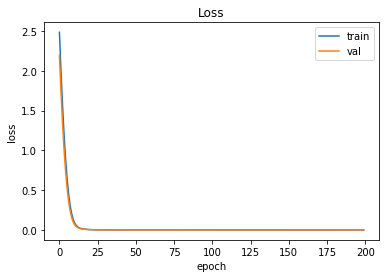

In [5]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

In [6]:
shared_weights = model.get_layer('shared').get_weights()
y_weights = model.get_layer('y').get_weights()
print('shared_weights\n', shared_weights, '\n')
print('y_weights\n', y_weights, '\n')

shared_weights
 [array([[1.9999996]], dtype=float32), array([1.0000004], dtype=float32)] 

y_weights
 [array([[1.9999987]], dtype=float32), array([0.99999976], dtype=float32)] 

